In [1]:
from utils import DeepResp
import tensorflow as tf
import cv2
import os
import PIL.Image
import numpy as np
import shutil

%load_ext autoreload
%autoreload 2
tf.get_logger().setLevel("INFO")

In [2]:
model_name = "batch32_cosine_decaing386epoch"
class_model = tf.keras.models.load_model(f"models/{model_name}.hdf5", compile=False);

In [3]:
names = ["dense"]
layers = [class_model.get_layer(name).output for name in names]

# Create the feature extraction model
dream_model = tf.keras.Model(inputs=class_model.input, outputs=layers)

In [4]:
def calc_loss_one_out(img, model):
    C = 0.3
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][0] * 1
        + layer_activations[0][4] * 1
        + layer_activations[0][5] * 1
        - C * tf.image.total_variation(img)
    )

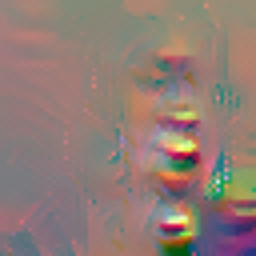

In [5]:
shutil.rmtree("face_dream", ignore_errors=True)
os.makedirs("face_dream")
dr = DeepResp(dream_model, calc_loss_one_out, 5000, 0.01)
for i in range(10):
    random_image = tf.random.uniform(
        [64, 64, 3],
        minval=0,
        maxval=None,
        dtype=tf.dtypes.float32,
        seed=None,
        name=None,
    )
    image = dr(random_image)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"face_dream/{i}.jpg", image_to_save)

In [ ]:
def calc_resp_loss_one_out(img, model):
    C = 0.5
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][2] * 1
        + layer_activations[0][6] * 1
        - C * tf.image.total_variation(img)
    )

In [ ]:
name = "resp_dream"
shutil.rmtree(name, ignore_errors=True)
os.makedirs(name)
dr = DeepResp(dream_model, calc_resp_loss_one_out, 5000, 0.01)
for i in range(10):
    random_image = tf.random.uniform(
        [64, 64, 3],
        minval=0,
        maxval=None,
        dtype=tf.dtypes.float32,
        seed=None,
        name=None,
    )
    image = dr(random_image)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"{name}/{i}.jpg", image_to_save)

In [ ]:
def calc_resp_loss_one_out(img, model):
    C = 0.6
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][2] * 1
        + layer_activations[0][6] * 1
        - C * tf.image.total_variation(img)
    )

In [ ]:
name = "green_resp"
shutil.rmtree(name, ignore_errors=True)
os.makedirs(name)
dr = DeepResp(dream_model, calc_resp_loss_one_out, 5000, 0.01)
for i in range(10):
    random_image = tf.random.uniform(
        [64, 64, 3],
        minval=0,
        maxval=None,
        dtype=tf.dtypes.float32,
        seed=None,
        name=None,
    )
    color = np.zeros(
        [64, 64, 3],
        dtype=np.float32,
    )
    color[:, :, 0] = 0.3
    color[:, :, 1] = 0.7
    color[:, :, 2] = 0.3
    color = tf.convert_to_tensor(color) + random_image / 10

    image = dr(color)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"{name}/{i}.jpg", image_to_save)

In [ ]:
def calc_loss_one_out(img, model):
    C = 0.3
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][0] * 1
        + layer_activations[0][4] * 1
        + layer_activations[0][5] * 1
        - C * tf.image.total_variation(img)
    )

In [ ]:
name = "green_face"
shutil.rmtree(name, ignore_errors=True)
os.makedirs(name)
dr = DeepResp(dream_model, calc_loss_one_out, 5000, 0.01)
for i in range(10):
    random_image = tf.random.uniform(
        [64, 64, 3],
        minval=0,
        maxval=None,
        dtype=tf.dtypes.float32,
        seed=None,
        name=None,
    )
    color = np.zeros(
        [64, 64, 3],
        dtype=np.float32,
    )
    color[:, :, 0] = 0.3
    color[:, :, 1] = 0.7
    color[:, :, 2] = 0.3
    color = tf.convert_to_tensor(color) + random_image / 10

    image = dr(color)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"{name}/{i}.jpg", image_to_save)

In [ ]:
def download(url, max_dim=None):
    name = url.split("/")[-1]
    image_path = tf.keras.utils.get_file(name, origin=url)
    img = PIL.Image.open(image_path)
    if max_dim:
        img.thumbnail((max_dim, max_dim))
    return np.array(img)


url = "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"
original_img = download(url, max_dim=500)
original_img = cv2.resize(original_img, (64, 64)).astype("float32") / 255
original_img = tf.convert_to_tensor(original_img)

In [ ]:
def calc_loss_one_out(img, model):
    C = 0.01
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][0] * 1
        + layer_activations[0][4] * 1
        + layer_activations[0][5] * 1
        - C * tf.image.total_variation(img)
    )

In [ ]:
name = "dog_face"
shutil.rmtree(name, ignore_errors=True)
os.makedirs(name)
dr = DeepResp(dream_model, calc_loss_one_out, 1500, 0.001)
for i in range(10):
    random_image = tf.random.uniform(
        [64, 64, 3],
        minval=0,
        maxval=None,
        dtype=tf.dtypes.float32,
        seed=None,
        name=None,
    )

    image = np.copy(original_img + random_image / 10)
    image = dr(image)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"{name}/{i}.jpg", image_to_save)

In [ ]:
image_to_save = download(url, max_dim=500)
image_to_save = cv2.resize(image_to_save, (256, 256))
image_to_save = cv2.cvtColor(image_to_save, cv2.COLOR_RGB2BGR)
cv2.imwrite("dog_face/dog.jpg", image_to_save)

In [ ]:
def calc_resp_loss_one_out(img, model):
    C = 1
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][0] * -1
        + layer_activations[0][4] * -1
        + layer_activations[0][5] * -1
        + layer_activations[0][2] * 1
        + layer_activations[0][6] * 1
        - C * tf.image.total_variation(img)
    )

In [ ]:
name = "green_resp_without_face"
shutil.rmtree(name, ignore_errors=True)
os.makedirs(name)
dr = DeepResp(dream_model, calc_resp_loss_one_out, 5000, 0.01)
for i in range(10):
    random_image = tf.random.uniform(
        [64, 64, 3],
        minval=0,
        maxval=None,
        dtype=tf.dtypes.float32,
        seed=None,
        name=None,
    )
    color = np.zeros(
        [64, 64, 3],
        dtype=np.float32,
    )
    color[:, :, 0] = 0.3
    color[:, :, 1] = 0.7
    color[:, :, 2] = 0.3
    color = tf.convert_to_tensor(color) + random_image / 10

    image = dr(color)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"{name}/{i}.jpg", image_to_save)

In [ ]:
def calc_loss_one_out(img, model):
    C = 0.5
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][0] * 1
        + layer_activations[0][4] * 1
        + layer_activations[0][5] * 1
        + layer_activations[0][2] * -1
        + layer_activations[0][6] * -1
        - C * tf.image.total_variation(img)
    )

In [ ]:
name = "green_face_without_resp"
shutil.rmtree(name, ignore_errors=True)
os.makedirs(name)
dr = DeepResp(dream_model, calc_loss_one_out, 5000, 0.01)
for i in range(10):
    random_image = tf.random.uniform(
        [64, 64, 3],
        minval=0,
        maxval=None,
        dtype=tf.dtypes.float32,
        seed=None,
        name=None,
    )
    color = np.zeros(
        [64, 64, 3],
        dtype=np.float32,
    )
    color[:, :, 0] = 0.3
    color[:, :, 1] = 0.7
    color[:, :, 2] = 0.3
    color = tf.convert_to_tensor(color) + random_image / 10

    image = dr(color)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"{name}/{i}.jpg", image_to_save)

In [ ]:
def calc_loss_one_out(img, model):
    C = 0.1
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][0] * 0
        + layer_activations[0][4] * 0
        + layer_activations[0][5] * 0
        + layer_activations[0][2] * 1
        + layer_activations[0][6] * 1
        - C * tf.image.total_variation(img)
    )

In [ ]:
name = "resp_img_resp_minimize"
shutil.rmtree(name, ignore_errors=True)
os.makedirs(name)
dr = DeepResp(dream_model, calc_loss_one_out, 5000, 0.001)


for i in range(5):
    img_path = f"respirators/  ({i + 1}).jpg"
    print(img_path)
    resp_image = cv2.imread(img_path).astype("float32") / 255
    resp_image = cv2.cvtColor(resp_image, cv2.COLOR_BGR2RGB)
    resp_image = tf.convert_to_tensor(resp_image)

    image = dr(resp_image)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"{name}/{i}.jpg", image_to_save)

In [ ]:
def calc_loss_one_out(img, model):
    C = 0.15
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    return (
        layer_activations[0][0] * -1
        + layer_activations[0][4] * -1
        + layer_activations[0][5] * -1
        + layer_activations[0][2] * -1
        + layer_activations[0][6] * -1
        - C * tf.image.total_variation(img)
    )

In [ ]:
name = "face_img_face_minimize"
shutil.rmtree(name, ignore_errors=True)
os.makedirs(name)
dr = DeepResp(dream_model, calc_loss_one_out, 6000, 0.0001)


for i in range(5):
    img_path = f"faces/  ({i + 1}).jpg"
    print(img_path)
    resp_image = cv2.imread(img_path).astype("float32") / 255
    resp_image = cv2.cvtColor(resp_image, cv2.COLOR_BGR2RGB)
    resp_image = tf.convert_to_tensor(resp_image)

    image = dr(resp_image)
    image_to_save = cv2.cvtColor(image.numpy(), cv2.COLOR_RGB2BGR)
    image_to_save = cv2.resize(image_to_save, (256, 256))
    cv2.imwrite(f"{name}/{i}.jpg", image_to_save)